In [57]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

data_file = "Thanhhoa.csv"
df = pd.read_csv(data_file)
thanhhoa = df.iloc[0:79,]
thanhhoa.head()

,Date,Users
0,2018-05-12-08,251722
1,2018-05-13-08,256886
2,2018-05-14-08,251226
3,2018-05-15-08,251353
4,2018-05-16-08,253116


In [58]:
len(thanhhoa)

79

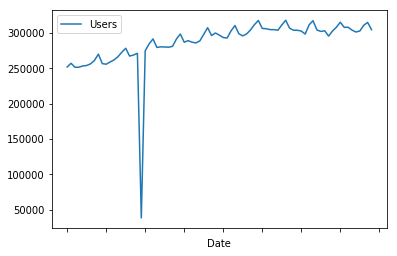

In [59]:
thanhhoa.set_index('Date').plot();

In [60]:
thanhhoa['Date'] = pd.to_datetime(thanhhoa['Date'])

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
thanhhoa.columns = ["ds", "y"]
thanhhoa.head()

,ds,y
0,2018-05-12 08:00:00,251722
1,2018-05-13 08:00:00,256886
2,2018-05-14 08:00:00,251226
3,2018-05-15 08:00:00,251353
4,2018-05-16 08:00:00,253116


In [62]:
m1 = Prophet()
m1.fit(thanhhoa)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thend\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [63]:
future1 = m1.make_future_dataframe(periods=10)
forecast1 = m1.predict(future1)

In [64]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n=10)

,ds,yhat,yhat_lower,yhat_upper
79,2018-07-31 08:00:00,321034.862950,288773.919437,354290.231777
80,2018-08-01 08:00:00,321083.690371,289487.973136,354441.762800
81,2018-08-02 08:00:00,299148.009777,265303.431352,334782.828662
82,2018-08-03 08:00:00,322282.113196,289981.021940,354875.200258
83,2018-08-04 08:00:00,329741.595449,298144.976026,360756.536919
84,2018-08-05 08:00:00,336404.668257,304847.110410,369386.817618
85,2018-08-06 08:00:00,325641.689697,292574.892287,360339.151268
86,2018-08-07 08:00:00,326727.487365,294395.339371,359494.325940
87,2018-08-08 08:00:00,326776.314786,293264.983774,357512.518173
88,2018-08-09 08:00:00,304840.634193,271296.975642,338125.216201


In [65]:
df.iloc[80:89,]

,Date,Users
80,2018-08-01-08,302615
81,2018-08-02-08,302970
82,2018-08-03-08,303610
83,2018-08-04-08,309586
84,2018-08-05-08,317224
85,2018-08-06-08,303838
86,2018-08-07-08,303035
87,2018-08-08-08,298316
88,2018-08-09-08,302101


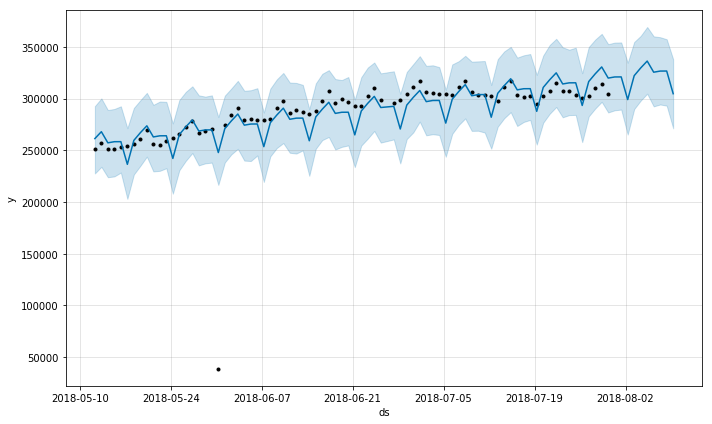

In [66]:
m1.plot(forecast1);

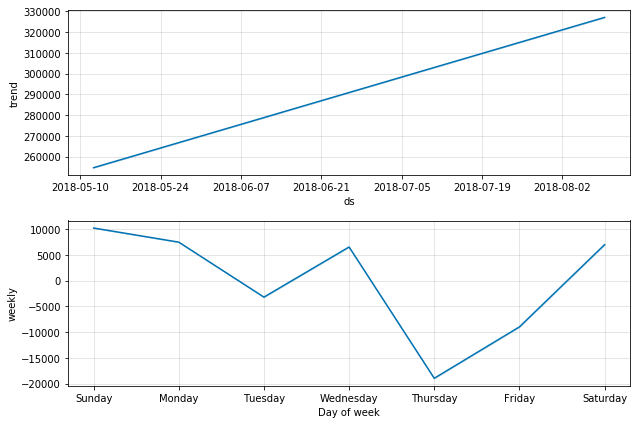

In [67]:
m1.plot_components(forecast1);